In [1]:
# So the old file takes ~40 mins to run, so I stripped out the essential bits 
# now that the project is closed. 

# Enjoy

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os.path
import sklearn as sk
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
import time
from datetime import date as dt
import openpyxl
from sklearn.linear_model import LogisticRegression
Current_Date = dt.today().strftime("%d-%b-%Y")

In [3]:
dailyExcel = "https://www.arcgis.com/sharing/rest/content/items/e5fd11150d274bebaaf8fe2a7a2bda11/data"
dailyCases = pd.read_excel(dailyExcel)

dailyCases.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57 entries, 0 to 56
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   DateVal       57 non-null     datetime64[ns]
 1   CMODateCount  57 non-null     int64         
 2   CumCases      57 non-null     int64         
 3   DailyDeaths   13 non-null     float64       
 4   CumDeaths     16 non-null     float64       
dtypes: datetime64[ns](1), float64(2), int64(2)
memory usage: 2.4 KB


In [4]:
nList = []
for x in dailyCases.index:
    nList.append(x)
    
dailyCases['n'] = nList
dailyCases.head()

cumulative = dailyCases[['n']].to_numpy()

extraValues = cumulative+cumulative.max()
predictive = np.vstack((cumulative, extraValues))

In [5]:
home = os.getcwd()
extension =  Current_Date
path = r"C:\Users\dilan\OneDrive\Documents\GitHub\DataprojectThree\reports_"

if os.path.isdir(path + extension):
    print("directory already made")
else:
    os.mkdir(path + extension)
    print("New directory made!") 

directory already made


In [6]:
linear = LinearRegression()

linear.fit(cumulative, dailyCases.CumCases.to_numpy())

poly4 = PolynomialFeatures(degree = 4)
Xgraph4 = poly4.fit_transform(cumulative)
poly4.fit(Xgraph4, dailyCases.CumCases.to_numpy())

linear2 = LinearRegression()
linear2.fit(Xgraph4, dailyCases.CumCases.to_numpy())

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [7]:
x = predictive.ravel()
y = linear2.predict(poly4.fit_transform(predictive))
d = np.vstack((x, y))
df = pd.DataFrame(data = d)
print (df)

          0           1          2          3           4           5    \
0    0.000000    1.000000   2.000000   3.000000    4.000000    5.000000   
1  494.813779  257.378431  71.836677 -67.792335 -167.184817 -231.712341   

          6          7          8           9    ...            104  \
0    6.000000    7.00000    8.00000    9.000000  ...     103.000000   
1 -266.441843 -276.13562 -265.25133 -237.941992  ...  537807.177443   

             105            106            107            108            109  \
0     104.000000     105.000000     106.000000     107.000000     108.000000   
1  565372.996654  593974.947863  623638.427984  654389.138571  686253.085815   

             110            111           112            113  
0     109.000000     110.000000     111.00000     112.000000  
1  719256.580546  753426.238232  788788.97898  825372.027535  

[2 rows x 114 columns]


In [8]:
writer = pd.ExcelWriter(Current_Date + '_Model.xlsx')
df.to_excel(writer, 'model', 'UTF-8')
os.chdir(path+extension)
writer.save()
os.chdir(home)

In [9]:
plt.figure(figsize=(40,40))
plt.scatter(dailyCases.n, dailyCases.CumCases)
plt.plot(dailyCases.n, linear2.predict(poly4.fit_transform(cumulative)))
plt.figsize=(40, 10)
os.chdir(path+extension)
plt.savefig(Current_Date + '_Model_Grap')
plt.close();
os.chdir(home)

In [10]:
plt.figure(figsize=(40,40))
plt.plot(dailyCases.n, dailyCases.CMODateCount)
plt.figsize=(40, 10)
os.chdir(path+extension)
plt.savefig(Current_Date + '_Daily_Change')
plt.close();
os.chdir(home)

In [11]:
plt.figure(figsize=(40,40))
plt.plot (dailyCases.n, dailyCases.CumCases)
plt.figsize=(40, 10)
os.chdir(path+extension)
plt.savefig(Current_Date + '_Daily_Cases')

plt.close();

os.chdir(home)

Afghanistan has been plotted
Albania has been plotted
Algeria has been plotted
Andorra has been plotted
Angola has been plotted
Antigua and Barbuda has been plotted
Argentina has been plotted
Armenia has been plotted
Austria has been plotted
Azerbaijan has been plotted
Bahamas has been plotted
Bahrain has been plotted
Bangladesh has been plotted
Barbados has been plotted
Belarus has been plotted
Belgium has been plotted
Belize has been plotted
Benin has been plotted
Bhutan has been plotted
Bolivia has been plotted
Bosnia and Herzegovina has been plotted
Brazil has been plotted
Brunei has been plotted


SystemError: <built-in method write of _io.BufferedWriter object at 0x000001712501FCA8> returned a result with an error set

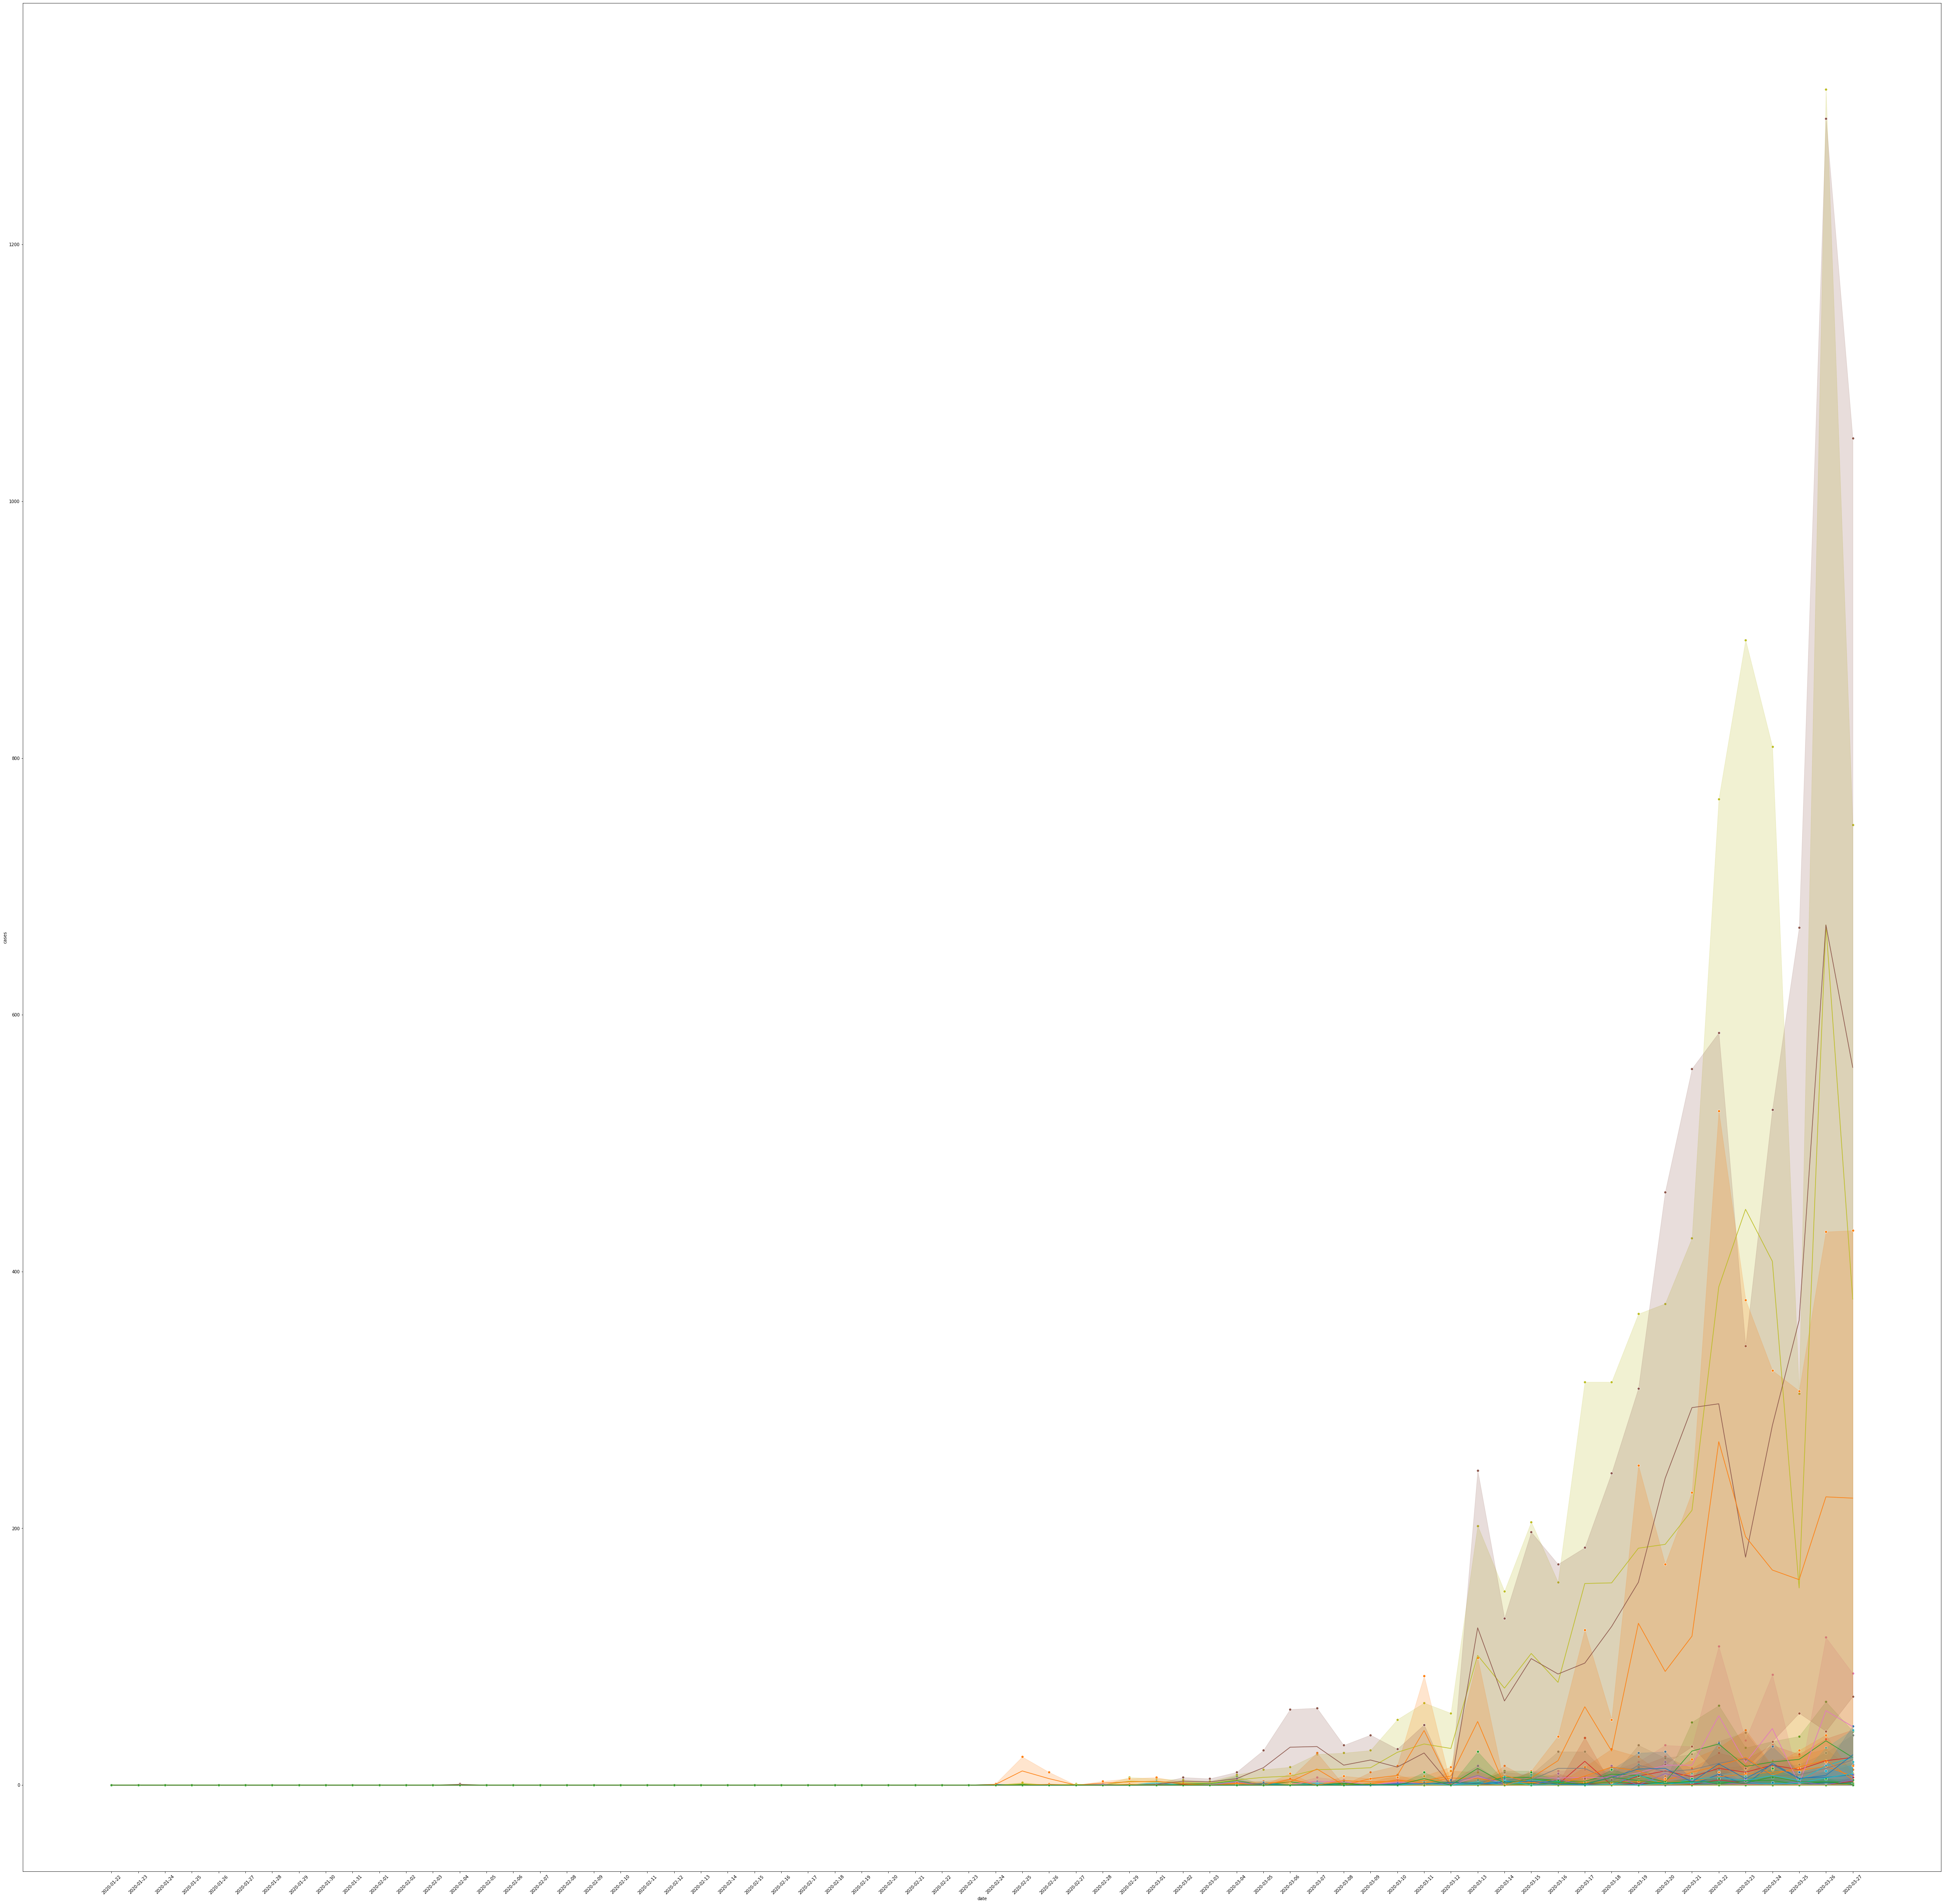

In [12]:
bigSetRaw = pd.read_csv("https://raw.githubusercontent.com/RamiKrispin/coronavirus-csv/master/coronavirus_dataset.csv")
bigSet = bigSetRaw.drop(['Lat'], axis = 1).drop(['Long'], axis = 1).drop(['Province.State'], axis = 1)
bigSet.rename(columns = {"Country.Region" : "Country"}, inplace = True )
plt.figure(figsize=(80,80))
for x in bigSet.Country.unique():
    plotSet = bigSet.loc[bigSet.Country == x]
    plotSet.head()
    sns.lineplot(plotSet.date, plotSet.cases)
    sns.scatterplot(plotSet.date, plotSet.cases)
    print(x + " has been plotted")
    
    plt.xticks(rotation = 45)
    os.chdir(path+extension)
    plt.savefig(Current_Date + '_Global_Graph')
    os.chdir(home)
    

In [ ]:
bigSet = bigSet.replace(to_replace = "Taiwan*" ,  value = "Taiwan") 

plt.figure(figsize=(80,80))
for x in bigSet.Country.unique():
    plotSet = bigSet.loc[bigSet.Country == x]

    sns.lineplot(plotSet.date, plotSet.cases.cumsum())
    print(x + " has been plotted")
    
    plt.xticks(rotation = 45)
    os.chdir(path+extension)
    plt.savefig(Current_Date + '_Global_Graph_cumulative')
    os.chdir(home)   
plt.close();

In [ ]:
for x in bigSet.Country.unique():
    
    plt.figure(figsize=(30,30))
    plotSet = bigSet.loc[bigSet.Country == x]

    sns.lineplot(plotSet.date, plotSet.cases.cumsum())
    print(x + " has been plotted")
    plt.xticks(rotation = 45)
    os.chdir(path+extension)
    plt.savefig(Current_Date + '_' + x + '_cases')
    plt.close();
    os.chdir(home)

In [ ]:
chinese = bigSet.loc[bigSet.Country == "China"]
chinaSet = chinese

nList = []
for x in chinaSet.index:
    nList.append(x)

zeroDay = nList[0]


for x in range(len(nList)):
    nList[x] = nList[x] - zeroDay  
    
chinaSet['n'] = nList

chinaSet['CumCases'] = chinaSet.cases.cumsum() 

cumulative = chinaSet[['n']].to_numpy()

dateUpper = 2000
dateLower = 1500

chinaSetTrim = chinaSet.loc[chinaSet.n >= dateLower]
x = chinaSetTrim[['n']].loc[chinaSetTrim.n <= dateUpper].to_numpy()
y = chinaSetTrim[['CumCases']].loc[chinaSetTrim.n <= dateUpper].to_numpy()

print("fitting logistic model")

logModel = LogisticRegression(multi_class='multinomial', solver ='newton-cg', max_iter = 5000)

logModel.fit(x,y)

print("logistic model fitted")

In [ ]:
popData = 'https://population.un.org/wpp/Download/Files/1_Indicators%20(Standard)/CSV_FILES/WPP2019_TotalPopulationBySex.csv'
popData = pd.read_csv(popData)
hubeiPop = 59000000

In [ ]:
extension =  Current_Date
path = r"C:\Users\dilan\OneDrive\Documents\GitHub\DataprojectThree\Forecasts\Forecast_"

if os.path.isdir(path + extension):
    print("directory already made")
else:
    os.mkdir(path + extension)
    print("New directory made!") 

CHx = chinaSetTrim[['n']].loc[chinaSetTrim.n <= dateUpper].to_numpy()
CHy = chinaSetTrim[['CumCases']].loc[chinaSetTrim.n <= dateUpper].to_numpy()

popData = popData.replace('Congo', 'Congo B')
popData = popData.replace('Guinea', 'Guinea 2')
popData = popData.replace('Guinea 2-Bissau', 'Guinea-Bissau')
popData = popData.replace('Equitorial Guinea 2', 'Equitorial Guinea')
popData = popData.replace('Dominica', 'Dominica 2')
popData = popData.replace('Dominica 2n', 'Dominican')
popData = popData.replace('Democratic Republic of the Congo B', 'Democratic Republic of the Congo')
popData = popData[~popData.Location.str.contains("(and dependencies)")] # Hacky code I had to steal as it is getting late
popData = popData[~popData.Location.str.contains("AIMS")]
popData = popData[~popData.Location.str.contains("New Zealand (and dependencies)")]
popData = popData[~popData.Location.str.contains("Oceania")]
popData = popData[~popData.Location.str.contains("Australia/New Zealand")]
popData = popData[~popData.Location.str.contains("South Sudan")]
popData = popData.replace('Republic of Korea', 'Republic of Korea 2')
popData = popData.replace("Dem. People's Republic of Korea 2", 'NorthKorea')
popData = popData.replace('Niger', 'Niger 2')
popData = popData.replace('Niger 2ia', 'Nigeria')
popData = popData[~popData.Location.str.contains("China, Hong Kong SAR")]
popData = popData[~popData.Location.str.contains("China (and dependencies)")]
popData = popData[~popData.Location.str.contains("China, Macao SAR")]
popData = popData.replace('China, Taiwan Province of China', 'Taiwan')
popData = popData[~popData.Location.str.contains("Less developed regions, excluding China")]


In [ ]:
bigSet = bigSet[~bigSet.Country.str.contains("Diamond Princess")]
bigSet = bigSet[~bigSet.Country.str.contains("Cruise Ship")]

for x in bigSet.Country.unique(): 
    
    plt.figure(figsize=(30,30))
    plotSet = bigSet.loc[bigSet.Country == x]
    
    # Some small exception handling below for working with the population data. Of course the DRC and the normal congo
    # are being annoying. Also accents suck. Also the UN doesn't have the population of cruise ships, annoyingly.
    
    if(x == 'Congo (Brazzaville)'):
        x = 'Congo B'
    if(x == 'Congo (Kinshasa)'):
        x = 'Democratic Republic of the Congo'
    if(x == "Cote d'Ivoire"):
        x = "Côte d'Ivoire"
    if(x == "Dominica"):
        x = "Dominica 2"
    if(x == "Guinea"):
        x = "Guinea 2"  
    if(x == "Korea, South"):
        x = "Republic of Korea 2"
    if(x == "Laos"):
        x = "Lao People's Democratic Republic"
    if(x == "Niger"):
        x = "Niger 2"
    if(x == "US"):
        x = "United States of America"
    if(x == "Vietnam"):
        x = "Viet Nam"
    if(x == 'West Bank and Gaza'):
        x = "State of Palestine"
        
    newPop = popData[popData.Time.eq(2019)]
    newPop = newPop[newPop.Location.str.contains(x)]
    newPop = newPop.PopTotal.to_numpy()
    newPop = newPop*1000
    
    print(newPop)
    
    nList = []
    
    for y in plotSet.index:
        nList.append(y)

    zeroDay = nList[0]

    for y in range(len(nList)):
        nList[y] = nList[y] - zeroDay  
    
    plotSet['n'] = nList

    plotSet['CumCases'] = plotSet.cases.cumsum()
    
    popRatio = newPop / hubeiPop
    print(popRatio)
    
    PSx = plotSet[['n']].to_numpy()
    PSy = plotSet[['CumCases']].to_numpy()
    
    dx = CHx[0] - PSx[0] + ((PSx[0] - PSx[0]) / 7)
    dy = CHy[0] - PSy[0] + ((PSy[0] - PSy[0]) / 2)

    plt.figure(figsize=(20,20))
    plt.scatter(PSx, PSy)
    plt.plot(CHx - dx, (logModel.predict(CHx) - dy)*popRatio )

    print(x + " has been plotted")
    plt.xticks(rotation = 45)
    os.chdir(path+extension)
    plt.savefig(Current_Date + '_' + x + '_cases_forecasted')
    plt.close();
    
os.chdir(home)